In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/samru/Desktop/DATA SCIENCE/Data Science Seven Mentor Notes/DSML/train.csv")

In [3]:
# Check data types and missing values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Get statistical summary

print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# View the first few rows

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Check for missing values

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


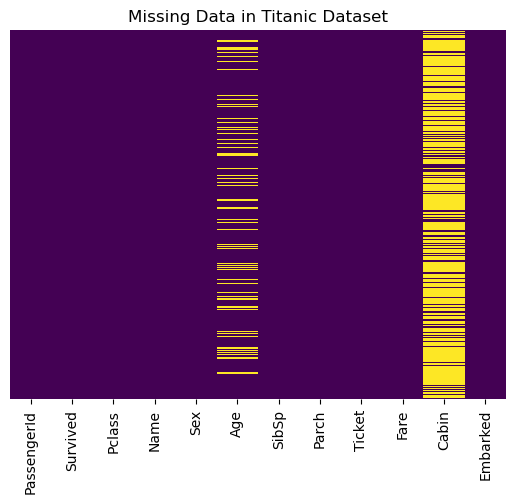

In [7]:
# Visualize missing data

sns.heatmap(df.isnull(), cmap= 'viridis',cbar=False, yticklabels=False)
plt.title("Missing Data in Titanic Dataset")
plt.show()

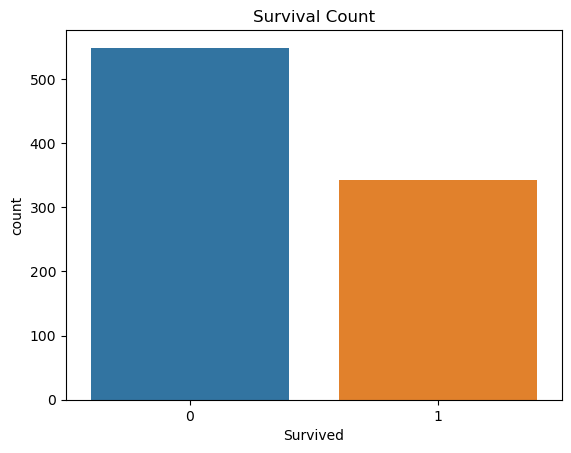

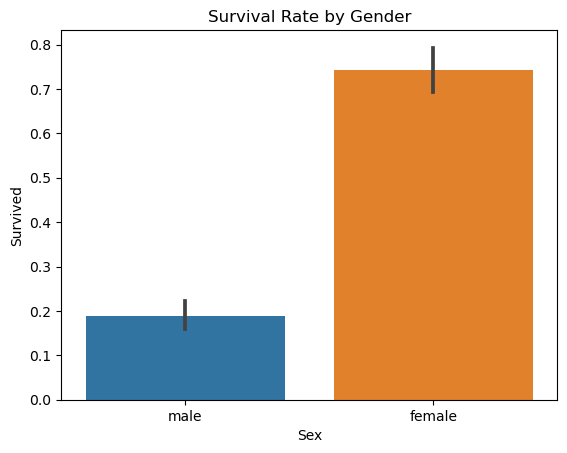

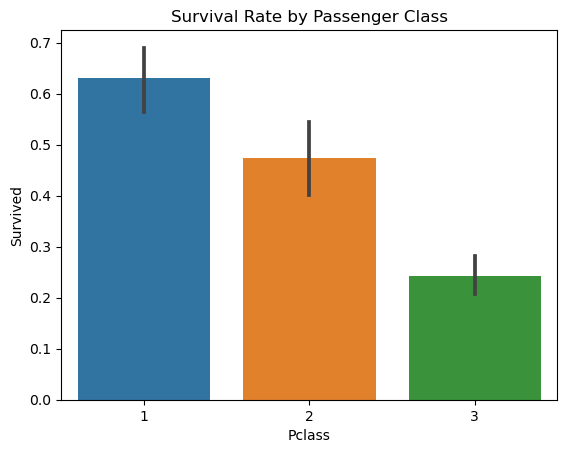

In [9]:
# Analyze survival rates based on key features

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Step 2: Data Cleaning & Feature Engineering (Using EDA Titanic Dataset)

In [13]:
# Fill missing values in the "Age" column with median age per Pclass & Sex

df["Age"] = df.groupby(["Pclass","Sex"])["Age"].transform(lambda x: x.fillna(x.median()))

In [14]:
# Drop irrelevant columns (like PassengerID, Name, Ticket, Cabin)

df.drop(["PassengerId", "Name", "Ticket","Cabin"], axis=1, inplace=True)

In [16]:
# Convert categorical variables into numerical values

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C": 1, "Q": 2, "S": 3})
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True) # Filling missing values

In [17]:
# Create a new feature: Family Size

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1 # Adding 1 to include the person

# Step 3: Machine Learning Model Development (Using Processed Data)

In [18]:
# 1. Split Data into Training & testing sets

from sklearn.model_selection import train_test_split

x = df.drop("Survived", axis=1)# Features
y = df["Survived"] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [21]:
# 2.Train a Machine Learning Model

# Logistic Regression
from sklearn.linear_model import LogisticRegression

from warnings import filterwarnings # this will support warnings
filterwarnings('ignore')
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Step 4: Hyperparameter Tuning & Model Optimization

In [25]:
# Use GridSearchCV for best hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


# Step 5: SAve & Deploy the Model

In [26]:
# 1. Save the model using Pickle

import pickle

with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [27]:
# Load the model for future use 

with open('titanic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
new_predictions = loaded_model.predict(x_test)
print("New Predictions:", new_predictions)

New Predictions: [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
